In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

In [0]:
# Initialize the random number generator
import random
random.seed(0)    # So that the results are reproducible  

import warnings
warnings.filterwarnings("ignore")

In [0]:
from tensorflow.keras.datasets import mnist

# Shuffling and splitting the data between training and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Label:5


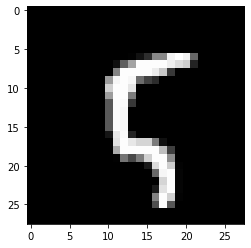

In [4]:
import matplotlib.pyplot as plt        # Visualizing the split with matplotlib
%matplotlib inline                     

print("Label:{}".format(y_train[100])) # Printing the 100th label 
plt.imshow(X_train[100], cmap='gray')  # Prinring the 100th image

# Fully connected Layer

In [5]:
# Checking the shape of the loaded data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# I have 60,000 input images in the train set and 10000 images in the testset each of size 28x28
# I have 60000 labels and similarly 10000 labels 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
# Reshaping the data to the format (no.of examples, height, width, channels) as expected by sequestial model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
# Now we need to normalize the data
# As images lie between 0 to 255 we will simply divide the image by 255 hence image value between 0-1
X_train = X_train.astype('float32')  #So that decimal values can be considered
X_test  = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

In [9]:
# now lets visualize again
print("Images in X_train:", X_train.shape)
print("Images in X_test:", X_test.shape)
print("Maximum value in X_train", X_train.max())
print("Minimum value in X_train:", X_train.min())

Images in X_train: (60000, 28, 28, 1)
Images in X_test: (10000, 28, 28, 1)
Maximum value in X_train 1.0
Minimum value in X_train: 0.0


In [10]:
# One hot encoding the labels 
# converts class vector to binary class matrix

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes= 10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])


Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Simple DNN

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()

# Model creation
This model contains one layer with ReLU as activation fucntion, and the final layer with SoftMax function

In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = "softmax"))

# Compile model
- Loss: categorical cross entropy
- metric: accuracy
- Optimizer: Stocastic gradient descent


In [0]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the Model
- give train data features and labels
- batch size = 32
- epochs = 10
- give validation data: testing features and labels

In [15]:
model.fit(x=X_train, y=y_train, batch_size= 32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6565 - accuracy: 0.8376 - val_loss: 0.3606 - val_accuracy: 0.9018
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.9050 - val_loss: 0.2990 - val_accuracy: 0.9162
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2931 - accuracy: 0.9176 - val_loss: 0.2629 - val_accuracy: 0.9271
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9267 - val_loss: 0.2414 - val_accuracy: 0.9330
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2386 - accuracy: 0.9334 - val_loss: 0.2226 - val_accuracy: 0.9375
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2201 - accuracy: 0.9384 - val_loss: 0.2072 - val_accuracy: 0.9425
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2043 - accuracy: 0.9428 - val_loss: 0.1935 - val_accuracy:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9518


[0.1668449342250824, 0.9517999887466431]

# Vanilla Convolution Neural Network
- Initialize sequencial model again
- Add 2 convolutional layer
- Flatten the data
- Add 2 dense layers


In [0]:
from tensorflow.keras.layers import Conv2D
modelc = Sequential()
modelc.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
modelc.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
modelc.add(Flatten())
modelc.add(Dense(128, activation="relu"))
modelc.add(Dense(10, activation="softmax"))

In [18]:
modelc.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
modelc.fit(x=X_train, y=y_train, batch_size= 32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1117 - accuracy: 0.9653 - val_loss: 0.0550 - val_accuracy: 0.9831
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0420 - val_accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0540 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0546 - val_accuracy: 0.9869


### We can see from above that with just 5 epochs we could reach the accuracy of 99% in the training set and loss of 0.01 which is great. In the validation set the accuracy dropped to 98% with loss of 0.05.

In [20]:
modelc.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0546 - accuracy: 0.9869


[0.05464332178235054, 0.9868999719619751]

# Vanilla CNN + Pooling + Dropout

In [0]:
from tensorflow.keras.layers import Dropout, MaxPooling2D

model_3 = Sequential()
# Convolutional layer with 32 filters and kernel 3x3
model_3.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28,28,1)))

In [0]:
# Add a Convolutional layer with 32 filters and kernel 3x3
model_3.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

In [0]:
# Add a Maxpooling layer of size 2x2
model_3.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
#Apply Dropout
model_3.add(Dropout(rate=0.2))

In [0]:
#Flatten the layer
model_3.add(Flatten())

In [0]:
# Add Fully Connected layer
model_3.add(Dense(128, activation="relu"))

In [0]:
# Fully connected layer with softmax
model_3.add(Dense(10, activation="softmax"))

In [32]:
model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Using Early Stopping
callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

model_3.fit(x=X_train, y=y_train, batch_size= 32, epochs=5, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1231 - accuracy: 0.9624 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 2/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0354 - val_accuracy: 0.9895


In [33]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0354 - accuracy: 0.9895


[0.03537476435303688, 0.9894999861717224]

### We can see that the loss has reduced with the Maxpooling layer and dropout

# Visualization

Predicted label: 6
Softmax Outputs: [[3.9607199e-04 4.3012975e-03 4.6410263e-03 1.1105408e-03 1.3892567e-03
  6.8760867e-04 9.8338044e-01 2.2146705e-04 3.7819035e-03 9.0278008e-05]]


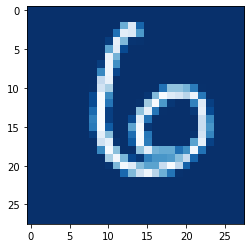

In [39]:
import matplotlib.pyplot as plt
plt.imshow(X_test[100].reshape(28, 28), cmap='Blues_r')
y_pred = model.predict(X_test[100].reshape(1,28,28,1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print()

Predicted label: 9
Softmax Outputs: [[7.1543932e-13 8.1912184e-09 2.4468584e-13 1.8877228e-05 2.4080142e-05
  4.4645507e-10 2.4862132e-15 1.1716014e-06 1.1461377e-12 9.9995589e-01]]


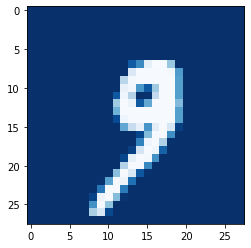

In [40]:
plt.imshow(X_test[1000].reshape(28, 28), cmap='Blues_r')
y_pred1 = modelc.predict(X_test[1000].reshape(1,28,28,1))
print("Predicted label:", y_pred1.argmax())
print("Softmax Outputs:", y_pred1)

Predicted label: 6
Softmax Outputs: [[2.9108916e-12 1.4742385e-10 3.7589697e-07 2.5970873e-08 1.5896225e-11
  3.3939679e-07 9.9999928e-01 5.1224287e-14 1.8587151e-08 6.9677087e-13]]


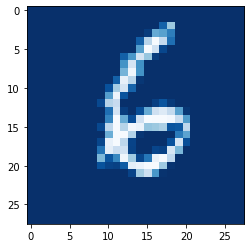

In [42]:
plt.imshow(X_test[2000].reshape(28, 28), cmap='Blues_r')
y_pred2 = modelc.predict(X_test[2000].reshape(1,28,28,1))
print("Predicted label:", y_pred2.argmax())
print("Softmax Outputs:", y_pred2)